In [1]:
import bootcampviztools as bt
from toolbox_ML import describe_df, tipifica_variables, get_features_num_regression, plot_features_num_regression, get_features_cat_regression, plot_features_cat_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

pd.options.mode.copy_on_write = True

### Problema de negocio
- Se busca predecir qué productos generaran beneficios y cuáles generan perdidas

### Importar datos

In [2]:
df = pd.read_csv("../data_sample/Superstore.csv", encoding="latin1")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


### Creación del target

In [3]:
def clasificar_profit(x):
    if x > 0:
        return "1" # -> beneficio
    else:
        return "0" # -> pérdida 

df["Profit_Class"] = df["Profit"].apply(clasificar_profit)

In [4]:
df = df.drop(columns=["Profit"])

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit_Class
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,1
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,1
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,1
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,0
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,1


### Dividir X_train, X_test, y_train, y_test

In [6]:
X = df.drop(["Profit_Class"], axis=1)
y = df["Profit_Class"].copy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

In [8]:
X_train.shape

(7995, 20)

In [9]:
X_test.shape

(1999, 20)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995 entries, 2667 to 4099
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         7995 non-null   int64  
 1   Order ID       7995 non-null   object 
 2   Order Date     7995 non-null   object 
 3   Ship Date      7995 non-null   object 
 4   Ship Mode      7995 non-null   object 
 5   Customer ID    7995 non-null   object 
 6   Customer Name  7995 non-null   object 
 7   Segment        7995 non-null   object 
 8   Country        7995 non-null   object 
 9   City           7995 non-null   object 
 10  State          7995 non-null   object 
 11  Postal Code    7995 non-null   int64  
 12  Region         7995 non-null   object 
 13  Product ID     7995 non-null   object 
 14  Category       7995 non-null   object 
 15  Sub-Category   7995 non-null   object 
 16  Product Name   7995 non-null   object 
 17  Sales          7995 non-null   float64
 18  Quantity  

In [11]:
X_train.describe()

,Row ID,Postal Code,Sales,Quantity,Discount
count,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000
mean,4975.072545,55239.642777,227.610270,3.789118,0.156306
std,2880.026057,32135.065867,636.220268,2.229413,0.206263
min,1.000000,1040.000000,0.556000,1.000000,0.000000
25%,2488.500000,23223.000000,17.145000,2.000000,0.000000
50%,4972.000000,58103.000000,54.816000,3.000000,0.200000
75%,7446.500000,90008.000000,207.000000,5.000000,0.200000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000


### Procesado de datos

#### Distribución del target

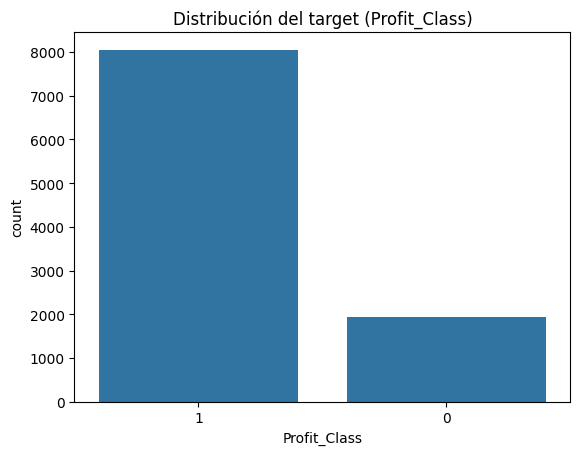

In [12]:
sns.countplot(data=df, x="Profit_Class")
plt.title("Distribución del target (Profit_Class)")
plt.show()

#### Transformación de variables

In [13]:
describe_df(X_train)

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
Row ID,int64,0.0,7995,100.00
Sales,float64,0.0,5023,62.83
Order ID,object,0.0,4450,55.66
Product ID,object,0.0,1830,22.89
Product Name,object,0.0,1818,22.74
Ship Date,object,0.0,1303,16.30
Order Date,object,0.0,1210,15.13
Customer ID,object,0.0,791,9.89
Customer Name,object,0.0,791,9.89
Postal Code,int64,0.0,611,7.64


##### Eliminamos variables con alta cardinalidad o que no le aporten información al modelo

In [14]:
cols_to_drop = ["Row ID", "Order ID", "Product ID","Customer ID", "Postal Code", "Customer Name", "Country"]
X_train = X_train.drop(columns=cols_to_drop, errors="ignore") # -> sirve para evitar que si una columna no esta presente en el otro set no nos de error
X_test = X_test.drop(columns=cols_to_drop, errors="ignore")

In [15]:
X_train.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount
2667,10/1/2016,10/1/2016,Same Day,Consumer,Amarillo,Texas,Central,Office Supplies,Paper,Easy-staple paper,28.352,1,0.2
4055,9/29/2014,10/3/2014,Standard Class,Corporate,Philadelphia,Pennsylvania,East,Office Supplies,Storage,Tennsco Single-Tier Lockers,1801.632,6,0.2
8533,11/30/2016,12/6/2016,Standard Class,Consumer,Detroit,Michigan,Central,Furniture,Chairs,High-Back Leather Manager's Chair,389.970,3,0.0
224,12/24/2015,12/27/2015,First Class,Consumer,Dublin,Ohio,East,Office Supplies,Art,Stanley Bostitch Contemporary Electric Pencil ...,27.168,2,0.2
847,10/13/2015,10/17/2015,Standard Class,Consumer,Louisville,Kentucky,South,Furniture,Chairs,Global Deluxe Office Fabric Chairs,287.940,3,0.0


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995 entries, 2667 to 4099
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    7995 non-null   object 
 1   Ship Date     7995 non-null   object 
 2   Ship Mode     7995 non-null   object 
 3   Segment       7995 non-null   object 
 4   City          7995 non-null   object 
 5   State         7995 non-null   object 
 6   Region        7995 non-null   object 
 7   Category      7995 non-null   object 
 8   Sub-Category  7995 non-null   object 
 9   Product Name  7995 non-null   object 
 10  Sales         7995 non-null   float64
 11  Quantity      7995 non-null   int64  
 12  Discount      7995 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 874.5+ KB


- Order date y Ship Date

In [17]:
X_train["Order Date"] = pd.to_datetime(X_train["Order Date"])
X_test["Order Date"] = pd.to_datetime(X_test["Order Date"])

X_train["Ship Date"] = pd.to_datetime(X_train["Ship Date"])
X_test["Ship Date"] = pd.to_datetime(X_test["Ship Date"])

In [18]:
X_train["Order_Year"] = X_train["Order Date"].dt.year
X_train["Order_Month"] = X_train["Order Date"].dt.month
X_train["Order_Day"] = X_train["Order Date"].dt.day

X_test["Order_Year"] = X_test["Order Date"].dt.year
X_test["Order_Month"] = X_test["Order Date"].dt.month
X_test["Order_Day"] = X_test["Order Date"].dt.day

In [19]:
X_train["Ship_Year"] = X_train["Ship Date"].dt.year
X_train["Ship_Month"] = X_train["Ship Date"].dt.month
X_train["Ship_Day"] = X_train["Ship Date"].dt.day

X_test["Ship_Year"] = X_test["Ship Date"].dt.year
X_test["Ship_Month"] = X_test["Ship Date"].dt.month
X_test["Ship_Day"] = X_test["Ship Date"].dt.day

In [20]:
X_train = X_train.drop(columns=["Order Date", "Ship Date"], errors="ignore") 
X_test = X_test.drop(columns=["Order Date", "Ship Date"], errors="ignore")

In [21]:
X_train.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Order_Year,Order_Month,Order_Day,Ship_Year,Ship_Month,Ship_Day
2667,Same Day,Consumer,Amarillo,Texas,Central,Office Supplies,Paper,Easy-staple paper,28.352,1,0.2,2016,10,1,2016,10,1
4055,Standard Class,Corporate,Philadelphia,Pennsylvania,East,Office Supplies,Storage,Tennsco Single-Tier Lockers,1801.632,6,0.2,2014,9,29,2014,10,3
8533,Standard Class,Consumer,Detroit,Michigan,Central,Furniture,Chairs,High-Back Leather Manager's Chair,389.970,3,0.0,2016,11,30,2016,12,6
224,First Class,Consumer,Dublin,Ohio,East,Office Supplies,Art,Stanley Bostitch Contemporary Electric Pencil ...,27.168,2,0.2,2015,12,24,2015,12,27
847,Standard Class,Consumer,Louisville,Kentucky,South,Furniture,Chairs,Global Deluxe Office Fabric Chairs,287.940,3,0.0,2015,10,13,2015,10,17


- Ship Mode -> aplicar get dummies

In [22]:
X_train["Ship Mode"].value_counts()

Ship Mode
Standard Class    4754
Second Class      1564
First Class       1243
Same Day           434
Name: count, dtype: int64

- Segment -> aplicar get dummies

In [23]:
X_train["Segment"].value_counts()

Segment
Consumer       4125
Corporate      2433
Home Office    1437
Name: count, dtype: int64

- City, State 

In [24]:
X_train["City"].value_counts()

City
New York City      737
Los Angeles        598
Philadelphia       423
San Francisco      418
Seattle            331
                  ... 
North Miami          1
San Luis Obispo      1
Murrieta             1
Champaign            1
Billings             1
Name: count, Length: 516, dtype: int64

In [25]:
X_train["State"].value_counts()

State
California              1622
New York                 904
Texas                    788
Pennsylvania             461
Washington               393
Illinois                 391
Ohio                     372
Florida                  306
Michigan                 202
North Carolina           191
Arizona                  182
Virginia                 178
Tennessee                152
Colorado                 151
Georgia                  144
Kentucky                 116
Indiana                  115
Massachusetts            112
New Jersey               106
Oregon                    99
Maryland                  86
Wisconsin                 80
Delaware                  72
Minnesota                 68
Connecticut               66
Oklahoma                  54
Alabama                   53
Rhode Island              51
Arkansas                  48
Missouri                  47
Utah                      45
Mississippi               43
Nevada                    34
Louisiana                 34
Nebraska

Eliminamos City y nos quedamos con State porque City tiene demasiadas categorías y aporta mucho ruido, mientras que State resume la información geográfica de forma estable y útil para el modelo

In [26]:
X_train = X_train.drop(columns=["Country"], errors="ignore") 
X_test = X_test.drop(columns=["Countrty"], errors="ignore")

- Region -> aplicar get dummies

- Product Name

In [27]:
X_train["Product Name"].value_counts()

Product Name
Easy-staple paper                                                            37
Staples                                                                      36
Staple envelope                                                              35
KI Adjustable-Height Table                                                   16
Staples in misc. colors                                                      15
                                                                             ..
Xerox 1980                                                                    1
Okidata MB760 Printer                                                         1
Hewlett-Packard Deskjet 6540 Color Inkjet Printer                             1
Belkin 7 Outlet SurgeMaster Surge Protector with Phone Protection             1
Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate     1
Name: count, Length: 1818, dtype: int64

In [28]:
import category_encoders as ce

# Crear el encoder
te_product = ce.TargetEncoder(cols=["Product Name"])

# Ajustar SOLO con train
te_product.fit(X_train["Product Name"], y_train)

# Transformar
X_train["ProductName_TE"] = te_product.transform(X_train["Product Name"])
X_test["ProductName_TE"] = te_product.transform(X_test["Product Name"])

# Eliminar la original
X_train = X_train.drop(columns=["Product Name"])
X_test = X_test.drop(columns=["Product Name"])

Target Encoding convierte cada producto en un número que representa su tendencia real a generar pérdidas o beneficios.

In [29]:
X_train.sample(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Order_Year,Order_Month,Order_Day,Ship_Year,Ship_Month,Ship_Day,ProductName_TE
9751,Standard Class,Consumer,Chicago,Illinois,Central,Office Supplies,Art,27.720,3,0.2,2016,10,11,2016,10,15,0.838800
266,Standard Class,Corporate,Chapel Hill,North Carolina,South,Office Supplies,Art,14.016,3,0.2,2017,6,16,2017,6,20,0.844580
1298,Second Class,Corporate,Saint Paul,Minnesota,Central,Technology,Phones,114.950,5,0.0,2016,12,8,2016,12,12,0.725368
9986,Standard Class,Consumer,Los Angeles,California,West,Technology,Accessories,36.240,1,0.0,2016,9,29,2016,10,3,0.838800
2632,Standard Class,Consumer,Seattle,Washington,West,Furniture,Chairs,42.624,2,0.2,2017,5,15,2017,5,20,0.768628
7961,Second Class,Corporate,Miramar,Florida,South,Office Supplies,Storage,81.360,5,0.2,2017,11,18,2017,11,23,0.745672
2405,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,128.744,7,0.2,2017,10,7,2017,10,11,0.725368
5040,First Class,Corporate,Wilmington,Delaware,East,Office Supplies,Binders,221.060,7,0.0,2015,7,11,2015,7,12,0.786558
9260,Second Class,Consumer,Aberdeen,South Dakota,Central,Office Supplies,Supplies,25.500,3,0.0,2017,11,11,2017,11,14,0.841598
2002,Second Class,Consumer,Louisville,Kentucky,South,Office Supplies,Storage,95.940,3,0.0,2017,12,25,2017,12,28,0.704592


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995 entries, 2667 to 4099
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ship Mode       7995 non-null   object 
 1   Segment         7995 non-null   object 
 2   City            7995 non-null   object 
 3   State           7995 non-null   object 
 4   Region          7995 non-null   object 
 5   Category        7995 non-null   object 
 6   Sub-Category    7995 non-null   object 
 7   Sales           7995 non-null   float64
 8   Quantity        7995 non-null   int64  
 9   Discount        7995 non-null   float64
 10  Order_Year      7995 non-null   int32  
 11  Order_Month     7995 non-null   int32  
 12  Order_Day       7995 non-null   int32  
 13  Ship_Year       7995 non-null   int32  
 14  Ship_Month      7995 non-null   int32  
 15  Ship_Day        7995 non-null   int32  
 16  ProductName_TE  7995 non-null   float64
dtypes: float64(3), int32(6), int64(1), 

In [31]:
X_train.describe()

,Sales,Quantity,Discount,Order_Year,Order_Month,Order_Day,Ship_Year,Ship_Month,Ship_Day,ProductName_TE
count,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000
mean,227.610270,3.789118,0.156306,2015.725078,7.828643,15.455535,2015.739712,7.768730,15.876798,0.806681
std,636.220268,2.229413,0.206263,1.123014,3.273025,8.764501,1.125552,3.327984,8.803214,0.054828
min,0.556000,1.000000,0.000000,2014.000000,1.000000,1.000000,2014.000000,1.000000,1.000000,0.604900
25%,17.145000,2.000000,0.000000,2015.000000,5.000000,8.000000,2015.000000,5.000000,8.000000,0.778641
50%,54.816000,3.000000,0.200000,2016.000000,9.000000,15.000000,2016.000000,9.000000,16.000000,0.833737
75%,207.000000,5.000000,0.200000,2017.000000,11.000000,23.000000,2017.000000,11.000000,24.000000,0.841598
max,22638.480000,14.000000,0.800000,2017.000000,12.000000,31.000000,2018.000000,12.000000,31.000000,0.970073


In [33]:
features_num = X_train.select_dtypes(include=["int64", "int32","float64"]).columns.tolist()
features_cat = X_train.select_dtypes(include=["object"]).columns.tolist()

features_num, features_cat

(['Sales',
  'Quantity',
  'Discount',
  'Order_Year',
  'Order_Month',
  'Order_Day',
  'Ship_Year',
  'Ship_Month',
  'Ship_Day',
  'ProductName_TE'],
 ['Ship Mode',
  'Segment',
  'City',
  'State',
  'Region',
  'Category',
  'Sub-Category'])

### Mini- EDA

### Procesado de las features categóricas